In [2]:
import torch
import torch.nn as nn
from d2l import torch as d2l

# 生成数据集

使用非线性函数生成一个数据集，并加入噪声$\epsilon$

$$
y_{i} = 2*sin(x_{i}) + x_{i}^{0.8} + \epsilon
$$

In [15]:
n_train = 50
x_train, _ = torch.sort(torch.rand(n_train)*5)

def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,)) 
# 生成训练集的标签，根据给定的输入数据和随机噪声 torch.normal(0.0, 0.5, (n_train,)) 生成标准差为 0.5 的正态分布噪声，共有 n_train 个样本
x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)  # 测试样本数
n_test

50

In [16]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],
             xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5);

# 平均汇聚

使用平均值，作为预测值，然后重复$n_{test}$次

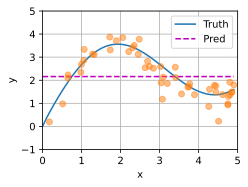

In [24]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

# 非参数注意力汇聚

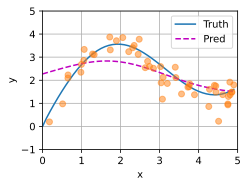

In [25]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

In [41]:
(X_repeat - x_train).shape

torch.Size([50, 50])

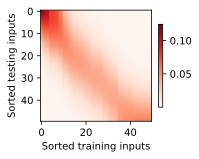

In [34]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
                  xlabel='Sorted training inputs',
                  ylabel='Sorted testing inputs')